<a href="https://colab.research.google.com/github/pao0318/Tensorflow2-Imperial-College-London/blob/main/Copy_of_Coding_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [ ]:
# Build the Sequential feedforward neural network model



In [ ]:
# Print the model summary



***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [ ]:
# Build the Sequential convolutional neural network model
model=Sequential([
                  Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)),
                  MaxPooling2D((3,3)),
                  Flatten(),
                  Dense(10,activation='softmax')
])


In [ ]:
# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [ ]:
# Define the model optimizer, loss function and metrics
opt=tf.keras.optimizers.Adam(learning_rate=0.005)
acc=tf.keras.metrics.SparseCategoricalAccuracy()
err=tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
              metrics=[acc,err])


In [ ]:
# Print the resulting model attributes
print(model.optimizer.lr)
print(model.loss)
print(model.metrics)
print(model.optimizer)


<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>
sparse_categorical_crossentropy
[]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [ ]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Print the shape of the training data
train_images.shape


(60000, 28, 28)

In [ ]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
print(train_labels[0])

9


In [ ]:
# Rescale the image values so that they lie in between 0 and 1.
train_images=train_images/255.
test_images=test_images/255.

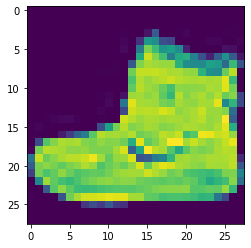

label Ankle boot


In [ ]:
# Display one of the images
i=0
img=train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f'label {labels[train_labels[i]]}')


#### Fit the model

In [ ]:
# Fit the model
history=model.fit(train_images[...,np.newaxis], train_labels, epochs=10, batch_size=256)


Epoch 1/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2556 - sparse_categorical_accuracy: 0.9062 - mean_absolute_error: 4.4200
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2539 - sparse_categorical_accuracy: 0.9072 - mean_absolute_error: 4.4200
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2473 - sparse_categorical_accuracy: 0.9085 - mean_absolute_error: 4.4200
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2443 - sparse_categorical_accuracy: 0.9108 - mean_absolute_error: 4.4200
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2431 - sparse_categorical_accuracy: 0.9112 - mean_absolute_error: 4.4200
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2404 - sparse_categorical_accuracy: 0.9118 - mean_absolute_error: 4.4200
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2358 - sparse_categorical_accu

#### Plot training history

In [ ]:
# Load the history into a pandas Dataframe
df=pd.DataFrame(history.history)
df.head()


,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.255586,0.906233,4.420000
1,0.253882,0.907167,4.420000
2,0.247328,0.908483,4.420001
3,0.244251,0.910800,4.420000
4,0.243081,0.911217,4.420000


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

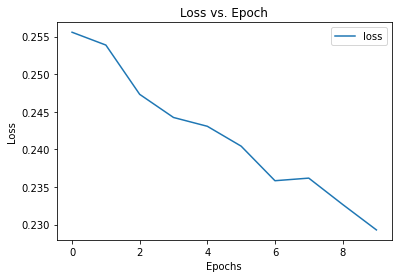

In [ ]:
# Make a plot for the loss
loss_plot=df.plot(y='loss',title="Loss vs. Epoch")
loss_plot.set(xlabel='Epochs',ylabel='Loss')


In [ ]:
# Make a plot for the accuracy



In [ ]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [ ]:
# Evaluate the model

model.evaluate(test_images[...,np.newaxis], test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3156 - sparse_categorical_accuracy: 0.8873 - mean_absolute_error: 4.4200


[0.31563127040863037, 0.8873000144958496, 4.419997215270996]

#### Make predictions from the model

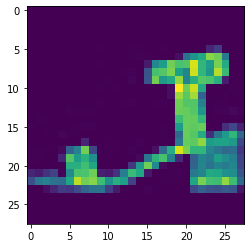

Label: Sandal


In [ ]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [ ]:
# Get the model predictions

